C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


            Classifier  Accuracy
0        Random Forest  0.892575
1                  SVC  0.860979
2  Logistic Regression  0.879937


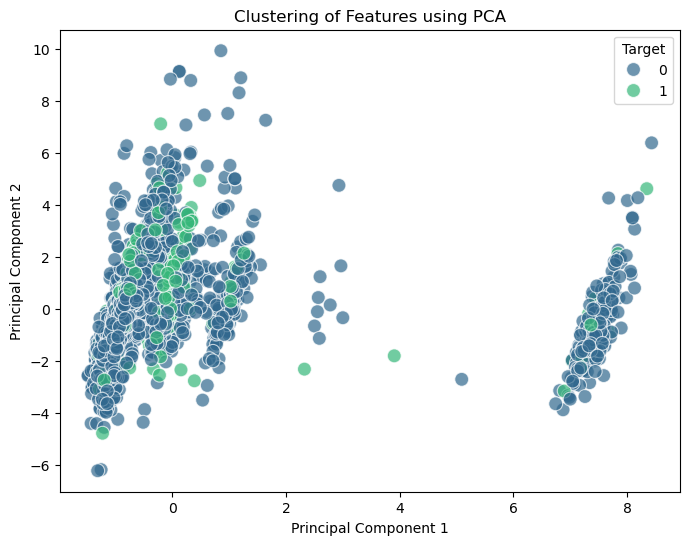

In [15]:
 # Use the Thyroid Disease database:
 # 1. Perform classification using different classifiers and list the results in tabular form.
 # 2. Visualize the clustering of all 5 features with their differences in a single plot.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('C:/Users/HP/OneDrive/Desktop/ml 7th sem codes/datasets/thyroid.csv')

# Preprocessing
label_encoder = LabelEncoder()

# Apply Label Encoding to columns that need it (categorical columns)
data['on_thyroxine'] = label_encoder.fit_transform(data['on_thyroxine'])
data['sex'] = label_encoder.fit_transform(data['sex'])

# Check if there are any other non-numeric columns and apply encoding
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Drop rows with missing values
data = data.dropna()

# Features and target
X = data.drop('on_thyroxine', axis=1)
y = data['on_thyroxine']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# SVC Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)

# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)

# Display results in a tabular form
results = pd.DataFrame({
    'Classifier': ['Random Forest', 'SVC', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, svc_accuracy, log_accuracy]
})
print(results)

# Visualize clustering of features using PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', s=100, alpha=0.7)
plt.title('Clustering of Features using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', loc='upper right')
plt.show()
